<a href="https://colab.research.google.com/github/GDurgaGowri/Predictions_ML/blob/main/textclasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras import models, layers
from keras.datasets import imdb
from keras.preprocessing import sequence


In [2]:
# Step 1: Load the IMDb dataset
(train_data, train_targets), (test_data, test_targets) = imdb.load_data(num_words=10000)

# Step 2: Concatenate train and test data
db = np.concatenate((train_data, test_data), axis=0)
targets = np.concatenate((train_targets, test_targets), axis=0)

# Step 3: Pad the sequences to ensure uniform input length (max_len = 500)
max_len = 500
db = sequence.pad_sequences(db, maxlen=max_len)


In [3]:
# Step 9: Check categories (target classes) and number of unique words
print('Categories:', np.unique(targets))

# Step 10: Count the number of unique words in the dataset
print('No. of unique words:', len(np.unique(np.hstack(db))))


Categories: [0 1]
No. of unique words: 9999


In [4]:
# Step 11: Calculate the length of each review in the dataset
length = [len(i) for i in db]

# Step 12: Print the average review length and standard deviation
print('Average review length:', np.mean(length))
print('Standard deviation of review lengths:', round(np.std(length)))


Average review length: 500.0
Standard deviation of review lengths: 0


In [5]:

print('label:',targets[0])
print(db[0])

label: 1
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0   

In [6]:
# Step 15: Get the word index mapping from IMDb dataset
index = imdb.get_word_index()

# Step 16: Reverse the word index to map integers back to words
reverse_index = dict([(value, key) for (key, value) in index.items()])

# Step 17: Decode the first review back to words
# Words are indexed by integers from 3 onwards (0, 1, 2 are reserved indices in Keras).
decoder = ' '.join([reverse_index.get(i - 3, '#') for i in db[0]])

# Step 18: Print the decoded review
print("Decoded first review:", decoder)


Decoded first review: # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much 

In [7]:
# Step 19: Define the vectorization function
def vectorize(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # Create a matrix of zeros
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1  # Set the index of each word in the sequence to 1
    return results

# Step 20: Vectorize the data (one-hot encoding)
db = vectorize(db)

# Step 21: Convert targets to float32
targets = np.array(targets).astype('float32')


In [8]:
test_x = db[:10000]
test_y = targets[:10000]
train_x = db[10000:]
train_y = targets[10000:]
model=models.Sequential()
model.add(layers.Dense(50,activation='relu',input_shape=(10000, )))
model.add(layers.Dropout(0.3,noise_shape=None,seed=None))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dropout(0.2,noise_shape=None,seed=None))
model.add(layers.Dense(50,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │         500,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_x,train_y,epochs=5,batch_size=500,validation_data=(test_x,test_y))

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - accuracy: 0.7252 - loss: 0.5256 - val_accuracy: 0.8908 - val_loss: 0.2686
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.9173 - loss: 0.2145 - val_accuracy: 0.8929 - val_loss: 0.2649
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9463 - loss: 0.1500 - val_accuracy: 0.8849 - val_loss: 0.2985
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9652 - loss: 0.1029 - val_accuracy: 0.8858 - val_loss: 0.3523
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.9780 - loss: 0.0665 - val_accuracy: 0.8842 - val_loss: 0.3832


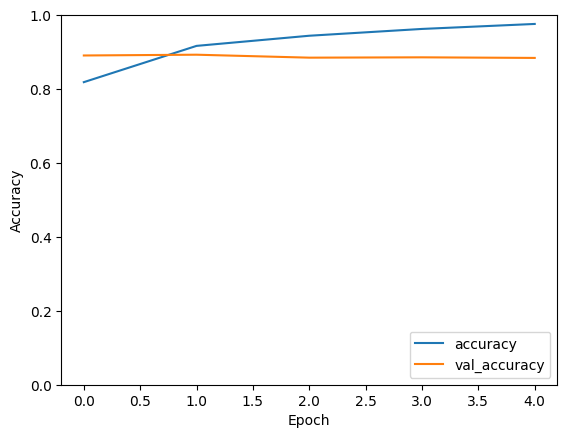

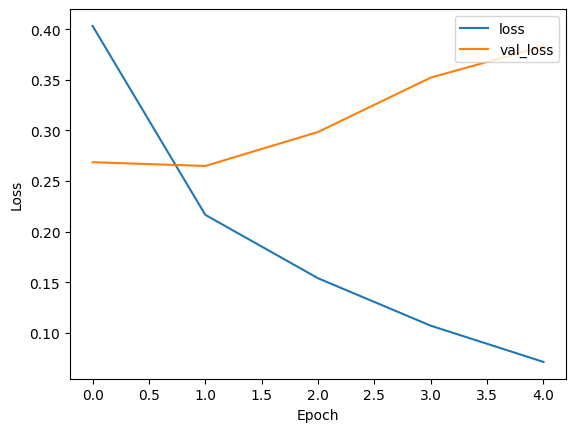

In [10]:
# Step 33: Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Step 34: Plot training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [11]:
# Step 35: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_x, test_y)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8881 - loss: 0.3723
Test Loss: 0.3832
Test Accuracy: 0.8842


In [12]:
# Step 36: Make predictions
predictions = model.predict(test_x)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [13]:
print('test-accuracy:',np.mean(history.history['val_accuracy']))

test-accuracy: 0.887719988822937


In [14]:
from sklearn.metrics import precision_score, f1_score, recall_score

# Step 37: Predict on test data
y_pred = (model.predict(test_x) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Step 38: Calculate precision, recall, and F1 score
precision = precision_score(test_y, y_pred)
recall = recall_score(test_y, y_pred)
f1 = f1_score(test_y, y_pred)

# Step 39: Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Precision: 0.8762
Recall: 0.8977
F1 Score: 0.8868


In [15]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(test_y, y_pred)

# Print accuracy
print(f"Accuracy: {accuracy:.4f}")
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_x, test_y)

# Print accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


Accuracy: 0.8842
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8881 - loss: 0.3723
Test Accuracy: 0.8842


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras import models, layers


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras import models

# Assuming `db` originally had integer-encoded sequences, decode it first if needed
# But since we should use raw text, let’s use a different method if db contains encoded sequences

# If you need to decode integers back to text (assuming you have a mapping):
index_word = imdb.get_word_index()
index_word = {v + 3: k for k, v in index_word.items()}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'
index_word[3] = '<UNUSED>'

def decode_review(encoded_review):
    return ' '.join([index_word.get(i, '?') for i in encoded_review])

# Decode a few samples
decoded_reviews = [decode_review(review) for review in db[:5]]
print(decoded_reviews)

# Initialize Tokenizer and fit on text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(decoded_reviews)
sequences = tokenizer.texts_to_sequences(decoded_reviews)

# Pad the sequences
data = pad_sequences(sequences, maxlen=1000)

# Define and compile the model
model = models.Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=1000))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Note: targets should be prepared similarly and use the same data processing steps

# Train the model (make sure `data` and `targets` are correctly aligned)
history = model.fit(data, targets[:len(data)], epochs=5, batch_size=500, validation_split=0.2)


['<START> <START> <START> <PAD> <START> <START> <START> <START> <START> <START> <PAD> <PAD> <START> <START> <START> <START> <START> <START> <START> <START> <PAD> <START> <START> <PAD> <PAD> <START> <START> <PAD> <START> <PAD> <START> <PAD> <START> <START> <PAD> <START> <START> <PAD> <START> <START> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <START> <PAD> <START> <PAD> <START> <START> <START> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <START> <START> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <START> <START> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <START> <START> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <START> <PAD> <PAD> <START> <START> <PAD> <START> <START> <PAD> <PAD> <PAD> <PAD> <START> <START> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <PAD> <START> <START> <PAD> <PAD> <PAD> <PAD> <PAD> <START> <PAD> <PAD> <START> <PAD> 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.7331
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step - accuracy: 0.5000 - loss: 0.6938 - val_accuracy: 0.0000e+00 - val_loss: 0.6942
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.5000 - loss: 0.6930 - val_accuracy: 1.0000 - val_loss: 0.6707
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 1.0000 - val_loss: 0.6710
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 1.0000 - val_loss: 0.6833


In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(data, targets[:len(data)])
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6000 - loss: 0.6909
Test Accuracy: 0.6000
Test Loss: 0.6909


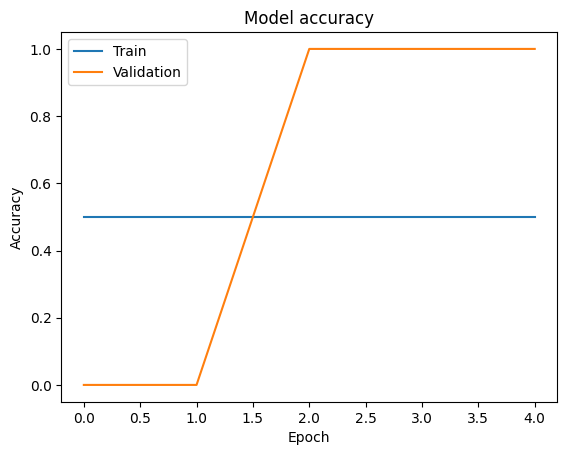

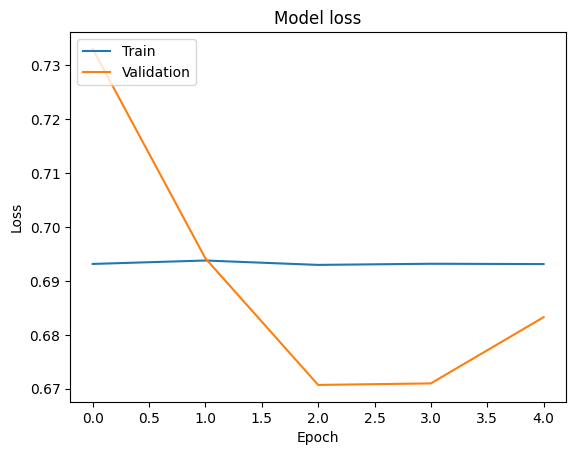

In [19]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, Dropout

# Define CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=10000, output_dim=128, input_length=1000))
model_cnn.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=4))
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=4))
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(1, activation='sigmoid'))

model_cnn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)